# Creación del dataset dsualm

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 11 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 electric furnace

- 3 microwave

- 4 television

- 5 kettle

- 6 vacuum_cleaner

- 7 electric space heater

- 8 alectric shower heater

- 9 fan

- 10 fridge

- 11 freezer


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [4]:
from nilmtk.dataset_converters import convert_ualm
convert_ualm('./data/ozm1/', 'dsual.h5','2022-12-16','2022-12-16')


Path ualm: ./data/ozm1/ /electricity

***********************************************************************************************
..Loading file    1 .csv
..Reading file csv
         timestamp        W      VAR         VA        f      VLN        PF  \
0     1.671189e+12  19.3651 -7.29568  20.693822  49.9858  244.756  0.677449   
1     1.671189e+12  18.1216 -7.34257  19.552613  49.9858  244.719  0.662701   
2     1.671189e+12  18.7815 -7.30944  20.153692  49.9863  244.816  0.608790   
3     1.671189e+12  18.6957 -6.92118  19.935710  49.9865  244.810  0.647708   
4     1.671189e+12  18.8183 -6.71063  19.978984  49.9865  244.819  0.669356   
...            ...      ...      ...        ...      ...      ...       ...   
3313  1.671190e+12  19.0930 -6.60880  20.204444  49.9892  244.182  0.595586   
3314  1.671190e+12  18.7826 -6.29239  19.808575  49.9890  244.302  0.655452   
3315  1.671190e+12  19.3965 -7.09461  20.653316  49.9890  244.271  0.658952   
3316  1.671190e+12  18.6521 -6.6

Convertidos los metdatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsual.h5 que contiene los datos recopilados y metadatos del dataset.

In [5]:
#dataset de referencia 
dsualm = DataSet('dsual.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [6]:
elec = dsualm.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(inst

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [7]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [8]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [9]:
elec.mains().power_series_all_data().head()

2022-12-16 12:13:08+01:00    18.743351
2022-12-16 12:13:09+01:00    18.521160
2022-12-16 12:13:10+01:00    18.515900
2022-12-16 12:13:11+01:00    18.532841
2022-12-16 12:13:12+01:00    18.497780
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [10]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', insta

### Etiquetas de dispositivos

In [11]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [12]:
print_dict(dsualm.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [13]:
print_dict(dsualm.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [14]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 7 o elec[7]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 8 o elec[8]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 9 o elec[9]


print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 10 o elec[10]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 11 o elec[11]




# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [15]:
boiler_meter = elec['kettle']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [16]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [17]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [18]:
boiler_meter.dominant_appliance()

Appliance(type='kettle', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [19]:
boiler_meter.total_energy() # kWh

active      0.035695
reactive    0.000140
apparent    0.035790
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [20]:
next(boiler_meter.load())

physical_quantity                pf   current     power                      \
type                                             active  reactive  apparent   
2022-12-16 12:13:08+01:00  0.808995  0.044196  8.761126 -2.194550  9.031914   
2022-12-16 12:13:09+01:00  0.746422  0.044723  8.048394 -2.442060  8.416543   
2022-12-16 12:13:10+01:00  0.516525  0.112963  8.633250 -3.980849  9.823528   
2022-12-16 12:13:11+01:00  0.802775  0.044446  8.697696 -2.315884  9.004163   
2022-12-16 12:13:12+01:00  0.694455  0.056743  8.852702 -2.385776  9.202332   
...                             ...       ...       ...       ...       ...   
2022-12-16 12:24:08+01:00  0.687481  0.053104  8.687290 -2.417998  9.034270   
2022-12-16 12:24:09+01:00  0.721020  0.048296  8.505942 -2.497394  8.866115   
2022-12-16 12:24:10+01:00  0.693714  0.050719  8.441272 -2.575164  8.826235   
2022-12-16 12:24:11+01:00  0.752216  0.046606  8.511152 -2.462372  8.866110   
2022-12-16 12:24:12+01:00  0.810842  0.046443  9.247210 -2.383660  9.549486   

physical_quantity             voltage  frequency  
type                                              
2022-12-16 12:13:08+01:00  246.057495  49.995499  
2022-12-16 12:13:09+01:00  246.115204  49.995560  
2022-12-16 12:13:10+01:00  246.066605  49.995838  
2022-12-16 12:13:11+01:00  246.066406  49.996418  
2022-12-16 12:13:12+01:00  245.919601  49.997021  
...                               ...        ...  
2022-12-16 12:24:08+01:00  245.520203  49.985519  
2022-12-16 12:24:09+01:00  245.504608  49.986000  
2022-12-16 12:24:10+01:00  245.466995  49.986122  
2022-12-16 12:24:11+01:00  245.517395  49.986538  
2022-12-16 12:24:12+01:00  245.557007  49.986500  

[665 rows x 7 columns]

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [21]:
next (boiler_meter.power_series())

2022-12-16 12:13:08+01:00    8.761126
2022-12-16 12:13:09+01:00    8.048394
2022-12-16 12:13:10+01:00    8.633250
2022-12-16 12:13:11+01:00    8.697696
2022-12-16 12:13:12+01:00    8.852702
                               ...   
2022-12-16 12:24:08+01:00    8.687290
2022-12-16 12:24:09+01:00    8.505942
2022-12-16 12:24:10+01:00    8.441272
2022-12-16 12:24:11+01:00    8.511152
2022-12-16 12:24:12+01:00    9.247210
Name: (power, active), Length: 665, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

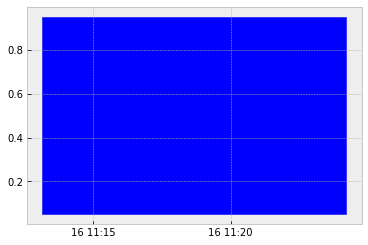

In [22]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [23]:
good_sections.combined()

[TimeFrame(start='2022-12-16 12:13:08+01:00', end='2022-12-16 12:24:12+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [24]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALM::

In [25]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [26]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [27]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [28]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['pf', 'power', 'current', 'frequency', 'voltage']

In [29]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['pf', 'power', 'current', 'frequency', 'voltage']

In [30]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (boiler)


['pf', 'power', 'current', 'frequency', 'voltage']

In [31]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (fan)


['pf', 'power', 'current', 'frequency', 'voltage']

In [32]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (freezer)


['pf', 'power', 'current', 'frequency', 'voltage']

In [33]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (television)


['pf', 'power', 'current', 'frequency', 'voltage']

In [34]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)


['pf', 'power', 'current', 'frequency', 'voltage']

In [35]:
elec[7].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['pf', 'power', 'current', 'frequency', 'voltage']

In [36]:
elec[8].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['pf', 'power', 'current', 'frequency', 'voltage']

In [37]:
elec[9].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['pf', 'power', 'current', 'frequency', 'voltage']

In [38]:
elec[10].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['pf', 'power', 'current', 'frequency', 'voltage']

In [39]:
elec[11].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['pf', 'power', 'current', 'frequency', 'voltage']

## Medidas disponibles relativas a la potencia


In [40]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active', 'apparent', 'reactive']

In [41]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active', 'apparent', 'reactive']

In [42]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active', 'apparent', 'reactive']

In [43]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active', 'apparent', 'reactive']

In [44]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active', 'apparent', 'reactive']

In [45]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [46]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [47]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [48]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [49]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [50]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [51]:
fan = elec['fan']
fan.available_columns()

[('pf', None),
 ('current', None),
 ('power', 'active'),
 ('power', 'reactive'),
 ('power', 'apparent'),
 ('voltage', None),
 ('frequency', None)]

In [52]:
kettle = elec['kettle']
kettle.available_columns()

[('pf', None),
 ('current', None),
 ('power', 'active'),
 ('power', 'reactive'),
 ('power', 'apparent'),
 ('voltage', None),
 ('frequency', None)]

In [53]:
fan = elec['fan']
fan.available_columns()

[('pf', None),
 ('current', None),
 ('power', 'active'),
 ('power', 'reactive'),
 ('power', 'apparent'),
 ('voltage', None),
 ('frequency', None)]

In [54]:
television = elec['television']
television.available_columns()

[('pf', None),
 ('current', None),
 ('power', 'active'),
 ('power', 'reactive'),
 ('power', 'apparent'),
 ('voltage', None),
 ('frequency', None)]

In [55]:
microwave = elec['microwave']
microwave.available_columns()

[('pf', None),
 ('current', None),
 ('power', 'active'),
 ('power', 'reactive'),
 ('power', 'apparent'),
 ('voltage', None),
 ('frequency', None)]

In [56]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('pf', None),
 ('current', None),
 ('power', 'active'),
 ('power', 'reactive'),
 ('power', 'apparent'),
 ('voltage', None),
 ('frequency', None)]

In [57]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('pf', None),
 ('current', None),
 ('power', 'active'),
 ('power', 'reactive'),
 ('power', 'apparent'),
 ('voltage', None),
 ('frequency', None)]

In [58]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('pf', None),
 ('current', None),
 ('power', 'active'),
 ('power', 'reactive'),
 ('power', 'apparent'),
 ('voltage', None),
 ('frequency', None)]

In [59]:
fridge = elec[10]
fridge.available_columns()

[('pf', None),
 ('current', None),
 ('power', 'active'),
 ('power', 'reactive'),
 ('power', 'apparent'),
 ('voltage', None),
 ('frequency', None)]

In [60]:
freezer = elec[11]
freezer.available_columns()

[('pf', None),
 ('current', None),
 ('power', 'active'),
 ('power', 'reactive'),
 ('power', 'apparent'),
 ('voltage', None),
 ('frequency', None)]

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [61]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['pf', 'power', 'current', 'frequency', 'voltage']
Mediciones de Potencia disponibles - Dataset: ['active', 'reactive', 'apparent']

Medidas disponibles por cada medidor:
Main: ['pf', 'power', 'current', 'frequency', 'voltage']
Electric furnace: ['pf', 'power', 'current', 'frequency', 'voltage']
Microwave: ['pf', 'power', 'current', 'frequency', 'voltage']
Television: ['pf', 'power', 'current', 'frequency', 'voltage']
Kettle: ['pf', 'power', 'current', 'frequency', 'voltage']
Vacuum cleaner: ['pf', 'power', 'current', 'frequency', 'voltage']
Electric space heater: ['pf', 'power', 'current', 'frequency', 'voltage']
Electric shower heater: ['pf', 'power', 'current', 'frequency', 'voltage']
Fan: ['pf', 'power', 'current', 'frequency', 'voltage']
Fridge: ['pf', 'power', 'current', 'frequency', 'voltage']
Freezer: ['pf', 'power', 'current', 'frequency', 'voltage']

Medidas de potencia por cada medidor:
Main: ['active', 'apparent', 'reactive']
Electric furna

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [62]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

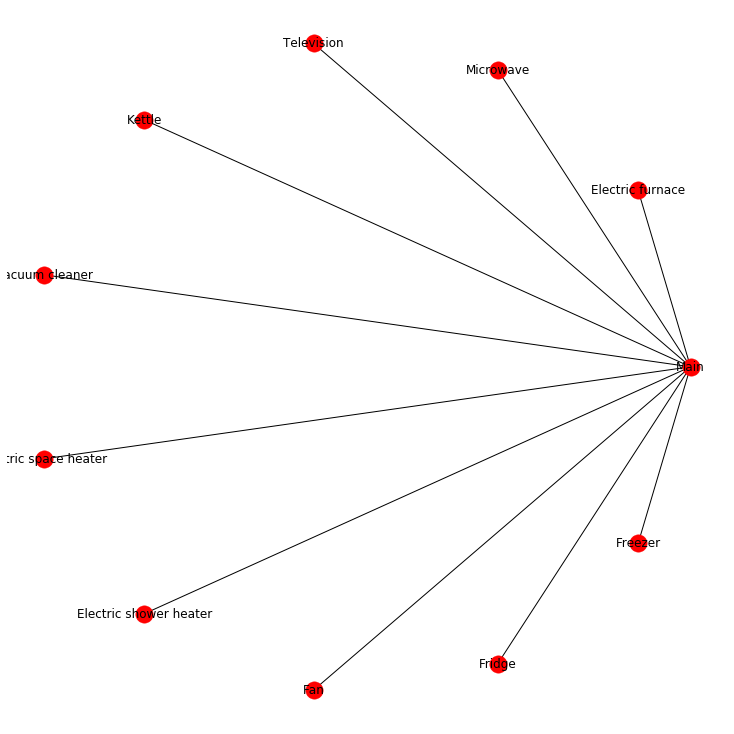

In [63]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [64]:
elec.get_timeframe()

TimeFrame(start='2022-12-16 12:13:08+01:00', end='2022-12-16 12:24:12+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 6 (es decir todos menos el principal). 

In [65]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-12-16 12:13:00+01:00,865.039001,5.115816,3.141698,8.394931,5.408081,9.430940,7.980844,7.425377,8.233968,10.250682
2022-12-16 12:14:00+01:00,1397.571655,429.020355,3.826919,10.304540,8.207166,8.353481,7.922238,7.342111,8.111005,10.295612
2022-12-16 12:15:00+01:00,91.679634,848.277039,-10.388235,11.267456,7.941047,8.482938,8.102174,7.461634,8.220806,10.496294
2022-12-16 12:16:00+01:00,6.960411,5.354131,-30.202225,709.339294,5.076140,8.539055,7.944884,7.390136,8.205031,10.292738
2022-12-16 12:17:00+01:00,6.766594,5.096271,3.068108,1352.125732,275.601379,9.260111,7.814998,7.268198,8.105731,10.128366
2022-12-16 12:18:00+01:00,6.906318,5.093319,3.769237,8.318365,518.192017,873.543640,7.895819,7.276382,8.138000,10.117344
2022-12-16 12:19:00+01:00,6.730402,5.032979,3.996216,8.014436,5.018065,1783.123657,507.395752,7.060714,7.917149,9.906290
2022-12-16 12:20:00+01:00,6.769215,5.009817,2.900564,8.090497,5.088541,9.046861,1046.897461,19.454399,7.891059,9.945961
2022-12-16 12:21:00+01:00,7.011437,5.414014,3.313955,8.365750,5.171175,9.027030,7.904919,33.327503,54.138386,10.446128
2022-12-16 12:22:00+01:00,7.108567,5.370291,3.097062,8.444525,5.343580,9.407888,7.921319,7.431364,61.064915,46.397633


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

In [66]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-12-16 12:13:00+01:00,24.444408,-2.121837,-2.755857,-2.456426,-1.614289,-4.748806,-2.860451,-3.099329,-2.326701,-1.647759
2022-12-16 12:14:00+01:00,22.505224,169.686737,-3.393739,-2.902466,-1.494417,-3.714855,-2.886672,-3.055939,-2.320715,-1.804529
2022-12-16 12:15:00+01:00,-29.804018,274.473877,0.799544,-4.154641,-2.910305,-4.381080,-2.907733,-3.076043,-2.350864,-1.686639
2022-12-16 12:16:00+01:00,-1.754206,-2.153912,5.148477,1.303807,-1.425988,-4.036335,-2.808381,-3.058844,-2.324192,-1.495208
2022-12-16 12:17:00+01:00,-1.829802,-2.098162,-2.679544,4.679945,18.087744,-4.463920,-2.847116,-3.048176,-2.304830,-1.716684
2022-12-16 12:18:00+01:00,-1.794604,-2.111291,-2.613268,-2.309491,35.393478,-3.189234,-2.839143,-3.015414,-2.320936,-1.632194
2022-12-16 12:19:00+01:00,-1.687508,-1.963291,-2.690798,-2.348488,-1.441809,-1.656509,-1.491912,-2.974184,-2.287447,-1.569726
2022-12-16 12:20:00+01:00,-1.631390,-2.048608,-2.825885,-2.253858,-1.258074,-4.279430,-0.445084,-2.658920,-2.315727,-1.684365
2022-12-16 12:21:00+01:00,-1.732539,-2.128581,-2.596194,-2.369256,-1.370406,-5.008367,-2.880434,-2.418509,8.991512,-1.724752
2022-12-16 12:22:00+01:00,-1.685852,-2.222009,-2.892326,-2.345977,-1.269529,-4.479156,-2.881643,-3.151134,6.198812,8.646140


Por ultimo, veamos la potencia aparente de los medidores del 2 al 6 (todos menos el principal).

In [67]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-12-16 12:13:00+01:00,865.558411,5.570193,4.503468,8.793375,5.898428,10.838305,8.484138,8.050517,8.559658,10.414878
2022-12-16 12:14:00+01:00,1400.877441,476.173615,5.996164,11.011771,9.798744,11.501128,8.462543,7.959934,8.439879,10.738809
2022-12-16 12:15:00+01:00,96.663002,892.217896,17.085390,13.251707,14.486818,11.024170,8.617248,8.075150,8.553592,10.707367
2022-12-16 12:16:00+01:00,7.262810,5.812327,33.561783,709.557129,6.114030,10.152732,8.435424,8.001840,8.530966,10.452737
2022-12-16 12:17:00+01:00,7.034634,5.531314,4.473913,1352.262817,276.463135,10.699239,8.322604,7.885452,8.430300,10.295973
2022-12-16 12:18:00+01:00,7.162480,5.535969,5.001922,8.666496,519.655273,874.414429,8.396262,7.881286,8.465372,10.284252
2022-12-16 12:19:00+01:00,7.000430,5.439310,5.394290,8.429520,5.785307,1784.037231,507.735443,7.665808,8.244332,10.065101
2022-12-16 12:20:00+01:00,7.004416,5.444408,5.114743,8.447147,5.585041,11.619723,1047.059692,19.886028,8.227567,10.155902
2022-12-16 12:21:00+01:00,7.258368,5.840462,4.767224,8.742361,5.667173,10.985108,8.419928,33.562458,55.948814,10.626423
2022-12-16 12:22:00+01:00,7.329478,5.829671,4.681684,8.788733,5.679980,10.851308,8.435476,8.076221,61.571468,47.783821


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [68]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2022-12-16 12:13:00+01:00 to 2022-12-16 12:24:00+01:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          12 non-null float32
(Microwave,)                 12 non-null float32
(Television,)                12 non-null float32
(Kettle,)                    12 non-null float32
(Vacuum cleaner,)            12 non-null float32
(Electric space heater,)     12 non-null float32
(Electric shower heater,)    12 non-null float32
(Fan,)                       12 non-null float32
(Fridge,)                    12 non-null float32
(Freezer,)                   12 non-null float32
dtypes: float32(10)
memory usage: 576.0 bytes


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 2(horno) con datos capturados de 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [98]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 
df_ef

physical_quantity                pf   current     power                      \
type                                             active  reactive  apparent   
2022-12-16 12:13:08+01:00  0.788898  0.038645  7.499730 -1.779330  7.707924   
2022-12-16 12:13:09+01:00  0.723074  0.039834  6.958764 -1.812324  7.198371   
2022-12-16 12:13:10+01:00  0.512974  0.092067  7.228310 -2.982321  8.101296   
2022-12-16 12:13:11+01:00  0.762997  0.038206  7.139772 -1.796092  7.366949   
2022-12-16 12:13:12+01:00  0.679660  0.048353  7.480924 -1.770175  7.720497   
...                             ...       ...       ...       ...       ...   
2022-12-16 12:23:56+01:00  0.669097  0.043510  7.106452 -1.751900  7.335806   
2022-12-16 12:23:57+01:00  0.650879  0.045976  7.318620 -1.612608  7.505379   
2022-12-16 12:23:58+01:00  0.697928  0.042759  7.314384 -1.537794  7.482855   
2022-12-16 12:23:59+01:00  0.660788  0.045101  7.170274 -1.788132  7.393130   
2022-12-16 12:24:00+01:00  0.694442  0.041523  7.047826 -1.892774  7.307392   

physical_quantity             voltage  frequency  
type                                              
2022-12-16 12:13:08+01:00  246.057495  49.995499  
2022-12-16 12:13:09+01:00  246.115204  49.995560  
2022-12-16 12:13:10+01:00  246.066605  49.995838  
2022-12-16 12:13:11+01:00  246.066406  49.996418  
2022-12-16 12:13:12+01:00  245.919601  49.997021  
...                               ...        ...  
2022-12-16 12:23:56+01:00  245.540802  49.984840  
2022-12-16 12:23:57+01:00  245.494995  49.984200  
2022-12-16 12:23:58+01:00  245.558807  49.983582  
2022-12-16 12:23:59+01:00  245.574402  49.983021  
2022-12-16 12:24:00+01:00  245.414398  49.983021  

[653 rows x 7 columns]

Se puede visualizar solo la cabecera de los datos

In [70]:
df_ef.head()

Empty DataFrame
Columns: [(pf, ), (current, ), (power, active), (power, reactive), (power, apparent), (voltage, ), (frequency, )]
Index: []

Vemos para el meter nº 3( microondas) con datos capturados de  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [99]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


df_m = next(elec[3].load())[t0:t1] #DataFrame medidor 
df_m

physical_quantity                pf   current     power                      \
type                                             active  reactive  apparent   
2022-12-16 12:13:08+01:00  0.710232  0.032386  5.645945 -2.166535  6.055913   
2022-12-16 12:13:09+01:00  0.694412  0.032390  5.516570 -2.210936  5.945770   
2022-12-16 12:13:10+01:00  0.524639  0.059661  5.474330 -1.049712  5.976803   
2022-12-16 12:13:11+01:00  0.697733  0.031967  5.474228 -2.144762  5.884835   
2022-12-16 12:13:12+01:00  0.596503  0.036187  5.037556 -2.224568  5.520058   
...                             ...       ...       ...       ...       ...   
2022-12-16 12:23:56+01:00  0.571617  0.038404  5.376886 -2.333444  5.865805   
2022-12-16 12:23:57+01:00  0.579371  0.039135  5.547634 -2.018854  5.911047   
2022-12-16 12:23:58+01:00  0.586220  0.037450  5.372874 -2.461328  5.924211   
2022-12-16 12:23:59+01:00  0.587867  0.039677  5.711210 -2.285650  6.164310   
2022-12-16 12:24:00+01:00  0.605693  0.037690  5.591448 -2.045598  5.957441   

physical_quantity             voltage  frequency  
type                                              
2022-12-16 12:13:08+01:00  246.057495  49.995499  
2022-12-16 12:13:09+01:00  246.115204  49.995560  
2022-12-16 12:13:10+01:00  246.066605  49.995838  
2022-12-16 12:13:11+01:00  246.066406  49.996418  
2022-12-16 12:13:12+01:00  245.919601  49.997021  
...                               ...        ...  
2022-12-16 12:23:56+01:00  245.540802  49.984840  
2022-12-16 12:23:57+01:00  245.494995  49.984200  
2022-12-16 12:23:58+01:00  245.558807  49.983582  
2022-12-16 12:23:59+01:00  245.574402  49.983021  
2022-12-16 12:24:00+01:00  245.414398  49.983021  

[653 rows x 7 columns]

Vemos para el meter nº 4(television) con datos capturados de  09:40 a 11:44  tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [100]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


df_ef = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
df_ef

physical_quantity                pf   current     power                      \
type                                             active  reactive  apparent   
2022-12-16 12:13:08+01:00  0.483651  0.028333  3.351615 -2.832625  4.391886   
2022-12-16 12:13:09+01:00  0.294877  0.057161  3.613958 -2.574232  4.597936   
2022-12-16 12:13:10+01:00  0.407668  0.041633  3.279798 -2.840422  4.347026   
2022-12-16 12:13:11+01:00  0.341851  0.054044  3.013862 -2.463901  4.037459   
2022-12-16 12:13:12+01:00  0.431582  0.042503  3.405566 -2.921860  4.488948   
...                             ...       ...       ...       ...       ...   
2022-12-16 12:23:56+01:00  0.357912  0.037353  2.966376 -2.826258  4.103261   
2022-12-16 12:23:57+01:00  0.311651  0.056878  2.903000 -3.533692  4.724938   
2022-12-16 12:23:58+01:00  0.297541  0.059896  3.597690 -3.016858  4.746692   
2022-12-16 12:23:59+01:00  0.285877  0.055498  2.994526 -3.286262  4.524802   
2022-12-16 12:24:00+01:00  0.388006  0.038431  3.336188 -2.918826  4.458645   

physical_quantity             voltage  frequency  
type                                              
2022-12-16 12:13:08+01:00  244.737488  49.985802  
2022-12-16 12:13:09+01:00  244.823196  49.986462  
2022-12-16 12:13:10+01:00  244.764999  49.986698  
2022-12-16 12:13:11+01:00  244.786606  49.987259  
2022-12-16 12:13:12+01:00  244.623596  49.988419  
...                               ...        ...  
2022-12-16 12:23:56+01:00  244.279999  49.988560  
2022-12-16 12:23:57+01:00  244.228806  49.988098  
2022-12-16 12:23:58+01:00  244.274399  49.987419  
2022-12-16 12:23:59+01:00  244.315994  49.987461  
2022-12-16 12:24:00+01:00  244.156601  49.987862  

[653 rows x 7 columns]

Veamos para el meter nº 5(tetera)  con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [101]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final



df_sh = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_sh

physical_quantity                pf   current     power                      \
type                                             active  reactive  apparent   
2022-12-16 12:13:08+01:00  0.808995  0.044196  8.761126 -2.194550  9.031914   
2022-12-16 12:13:09+01:00  0.746422  0.044723  8.048394 -2.442060  8.416543   
2022-12-16 12:13:10+01:00  0.516525  0.112963  8.633250 -3.980849  9.823528   
2022-12-16 12:13:11+01:00  0.802775  0.044446  8.697696 -2.315884  9.004163   
2022-12-16 12:13:12+01:00  0.694455  0.056743  8.852702 -2.385776  9.202332   
...                             ...       ...       ...       ...       ...   
2022-12-16 12:23:56+01:00  0.704216  0.049559  8.503874 -2.503286  8.873030   
2022-12-16 12:23:57+01:00  0.673728  0.052696  8.658118 -2.309142  8.982780   
2022-12-16 12:23:58+01:00  0.731439  0.046594  8.326104 -2.309920  8.646165   
2022-12-16 12:23:59+01:00  0.677524  0.050425  8.200928 -2.340578  8.535672   
2022-12-16 12:24:00+01:00  0.731290  0.048047  8.576064 -2.870806  9.051515   

physical_quantity             voltage  frequency  
type                                              
2022-12-16 12:13:08+01:00  246.057495  49.995499  
2022-12-16 12:13:09+01:00  246.115204  49.995560  
2022-12-16 12:13:10+01:00  246.066605  49.995838  
2022-12-16 12:13:11+01:00  246.066406  49.996418  
2022-12-16 12:13:12+01:00  245.919601  49.997021  
...                               ...        ...  
2022-12-16 12:23:56+01:00  245.540802  49.984840  
2022-12-16 12:23:57+01:00  245.494995  49.984200  
2022-12-16 12:23:58+01:00  245.558807  49.983582  
2022-12-16 12:23:59+01:00  245.574402  49.983021  
2022-12-16 12:24:00+01:00  245.414398  49.983021  

[653 rows x 7 columns]

Veamos para el meter nº 6(Aspiradora) con datos capturados de  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [102]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final



df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_vc

physical_quantity                pf   current     power                      \
type                                             active  reactive  apparent   
2022-12-16 12:13:08+01:00  0.659343  0.034741  5.538945 -1.876550  5.858264   
2022-12-16 12:13:09+01:00  0.501534  0.050536  4.894008 -1.278351  5.113760   
2022-12-16 12:13:10+01:00  0.362093  0.199704  5.795711 -5.096220  8.723047   
2022-12-16 12:13:11+01:00  0.507300  0.046352  5.321604 -1.547772  5.552900   
2022-12-16 12:13:12+01:00  0.427497  0.078554  5.807214 -1.589705  6.208900   
...                             ...       ...       ...       ...       ...   
2022-12-16 12:23:56+01:00  0.491892  0.049267  5.473092 -1.535612  5.706740   
2022-12-16 12:23:57+01:00  0.381945  0.066162  5.794058 -1.095112  5.951010   
2022-12-16 12:23:58+01:00  0.537777  0.045627  5.605824 -1.029530  5.746326   
2022-12-16 12:23:59+01:00  0.444890  0.056559  4.705978 -1.319178  4.894440   
2022-12-16 12:24:00+01:00  0.518278  0.047404  5.483546 -1.813434  5.848482   

physical_quantity             voltage  frequency  
type                                              
2022-12-16 12:13:08+01:00  246.057495  49.995499  
2022-12-16 12:13:09+01:00  246.115204  49.995560  
2022-12-16 12:13:10+01:00  246.066605  49.995838  
2022-12-16 12:13:11+01:00  246.066406  49.996418  
2022-12-16 12:13:12+01:00  245.919601  49.997021  
...                               ...        ...  
2022-12-16 12:23:56+01:00  245.540802  49.984840  
2022-12-16 12:23:57+01:00  245.494995  49.984200  
2022-12-16 12:23:58+01:00  245.558807  49.983582  
2022-12-16 12:23:59+01:00  245.574402  49.983021  
2022-12-16 12:24:00+01:00  245.414398  49.983021  

[653 rows x 7 columns]

Veamos para el ultimo meter nº 7(estufa de aceite) con datos capturados  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [75]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


df_sph = next(elec[7].load())[t0:t1] #DataFrame medidor boiler
df_sph

Empty DataFrame
Columns: [(pf, ), (current, ), (power, active), (power, reactive), (power, apparent), (voltage, ), (frequency, )]
Index: []

Veamos para el ultimo meter nº 8(calentador de agua) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [103]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


df_shh = next(elec[8].load())[t0:t1] #DataFrame medidor boiler
df_shh

physical_quantity                pf   current     power                      \
type                                             active  reactive  apparent   
2022-12-16 12:13:08+01:00  0.802207  0.041225  8.088386 -2.723055  8.535530   
2022-12-16 12:13:09+01:00  0.814197  0.040820  8.120004 -2.959706  8.645133   
2022-12-16 12:13:10+01:00  0.811930  0.041520  8.237182 -2.903226  8.734887   
2022-12-16 12:13:11+01:00  0.802077  0.042032  8.222506 -2.913342  8.727001   
2022-12-16 12:13:12+01:00  0.807598  0.040799  8.051330 -2.969250  8.583033   
...                             ...       ...       ...       ...       ...   
2022-12-16 12:23:56+01:00  0.805587  0.039868  7.830234 -2.607510  8.258607   
2022-12-16 12:23:57+01:00  0.804486  0.039576  7.761960 -2.855984  8.278738   
2022-12-16 12:23:58+01:00  0.787560  0.040094  7.694498 -2.934482  8.239394   
2022-12-16 12:23:59+01:00  0.811198  0.039949  7.896348 -2.734394  8.359878   
2022-12-16 12:24:00+01:00  0.809721  0.039432  7.779754 -3.050690  8.360486   

physical_quantity             voltage  frequency  
type                                              
2022-12-16 12:13:08+01:00  244.718994  50.036499  
2022-12-16 12:13:09+01:00  244.377594  50.036701  
2022-12-16 12:13:10+01:00  244.318604  50.036900  
2022-12-16 12:13:11+01:00  244.371002  50.038120  
2022-12-16 12:13:12+01:00  244.318390  50.038841  
...                               ...        ...  
2022-12-16 12:23:56+01:00  243.930405  50.037521  
2022-12-16 12:23:57+01:00  243.820602  50.037800  
2022-12-16 12:23:58+01:00  243.886398  50.034920  
2022-12-16 12:23:59+01:00  243.852798  50.033958  
2022-12-16 12:24:00+01:00  243.688202  50.034920  

[653 rows x 7 columns]

Veamos para el ultimo meter nº 9(ventilador) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [104]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler
df_fan

physical_quantity                pf   current     power                      \
type                                             active  reactive  apparent   
2022-12-16 12:13:08+01:00  0.781295  0.037579  7.181180 -3.101110  7.822165   
2022-12-16 12:13:09+01:00  0.803007  0.037931  7.442422 -3.158442  8.088263   
2022-12-16 12:13:10+01:00  0.795169  0.038827  7.542340 -3.055670  8.141217   
2022-12-16 12:13:11+01:00  0.797637  0.038381  7.474158 -3.154860  8.116779   
2022-12-16 12:13:12+01:00  0.819779  0.037679  7.546676 -2.867784  8.075407   
...                             ...       ...       ...       ...       ...   
2022-12-16 12:23:56+01:00  0.806582  0.037893  7.454502 -3.082502  8.068281   
2022-12-16 12:23:57+01:00  0.797172  0.037696  7.328248 -3.008012  7.927036   
2022-12-16 12:23:58+01:00  0.807810  0.037156  7.320028 -3.220256  8.001052   
2022-12-16 12:23:59+01:00  0.823637  0.037781  7.588098 -2.992218  8.157703   
2022-12-16 12:24:00+01:00  0.794546  0.038882  7.528418 -3.079636  8.135843   

physical_quantity             voltage  frequency  
type                                              
2022-12-16 12:13:08+01:00  244.718994  50.036499  
2022-12-16 12:13:09+01:00  244.377594  50.036701  
2022-12-16 12:13:10+01:00  244.318604  50.036900  
2022-12-16 12:13:11+01:00  244.371002  50.038120  
2022-12-16 12:13:12+01:00  244.318390  50.038841  
...                               ...        ...  
2022-12-16 12:23:56+01:00  243.930405  50.037521  
2022-12-16 12:23:57+01:00  243.820602  50.037800  
2022-12-16 12:23:58+01:00  243.886398  50.034920  
2022-12-16 12:23:59+01:00  243.852798  50.033958  
2022-12-16 12:24:00+01:00  243.688202  50.034920  

[653 rows x 7 columns]

Veamos para el ultimo meter nº 10(nevera) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [105]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


df_fridge = next(elec[10].load())[t0:t1] #DataFrame medidor boiler
df_fridge

physical_quantity                pf   current     power                      \
type                                             active  reactive  apparent   
2022-12-16 12:13:08+01:00  0.884657  0.038994  8.441885 -2.485750  8.802580   
2022-12-16 12:13:09+01:00  0.865232  0.040196  8.502158 -2.605994  8.896657   
2022-12-16 12:13:10+01:00  0.833861  0.041049  8.355238 -2.404600  8.696640   
2022-12-16 12:13:11+01:00  0.856524  0.039996  8.368192 -2.275420  8.672240   
2022-12-16 12:13:12+01:00  0.868029  0.039362  8.347336 -2.170456  8.625506   
...                             ...       ...       ...       ...       ...   
2022-12-16 12:23:56+01:00  0.867641  0.039796  8.420620 -2.301278  8.732758   
2022-12-16 12:23:57+01:00  0.870558  0.039777  8.443194 -2.411286  8.785706   
2022-12-16 12:23:58+01:00  0.865175  0.039105  8.247583 -2.465068  8.609541   
2022-12-16 12:23:59+01:00  0.867409  0.040089  8.481440 -2.351356  8.802577   
2022-12-16 12:24:00+01:00  0.861244  0.041162  8.636704 -2.395546  8.963667   

physical_quantity             voltage  frequency  
type                                              
2022-12-16 12:13:08+01:00  244.718994  50.036499  
2022-12-16 12:13:09+01:00  244.377594  50.036701  
2022-12-16 12:13:10+01:00  244.318604  50.036900  
2022-12-16 12:13:11+01:00  244.371002  50.038120  
2022-12-16 12:13:12+01:00  244.318390  50.038841  
...                               ...        ...  
2022-12-16 12:23:56+01:00  243.930405  50.037521  
2022-12-16 12:23:57+01:00  243.820602  50.037800  
2022-12-16 12:23:58+01:00  243.886398  50.034920  
2022-12-16 12:23:59+01:00  243.852798  50.033958  
2022-12-16 12:24:00+01:00  243.688202  50.034920  

[653 rows x 7 columns]

Veamos para el ultimo meter nº 11(congelador) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [107]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


df_freezer = next(elec[11].load())[t0:t1] #DataFrame medidor boiler
df_freezer

physical_quantity                pf   current      power                       \
type                                              active  reactive   apparent   
2022-12-16 12:13:08+01:00  0.833343  0.050166  10.148550 -1.867025  10.320467   
2022-12-16 12:13:09+01:00  0.856639  0.050815  10.507800 -1.637924  10.637648   
2022-12-16 12:13:10+01:00  0.871248  0.049714  10.502420 -1.666206  10.641465   
2022-12-16 12:13:11+01:00  0.841292  0.051799  10.551200 -1.778492  10.701159   
2022-12-16 12:13:12+01:00  0.875527  0.049786  10.553500 -1.657486  10.685476   
...                             ...       ...        ...       ...        ...   
2022-12-16 12:23:56+01:00  0.743192  0.055532   9.931668 -1.517868  10.052079   
2022-12-16 12:23:57+01:00  0.909000  0.047666  10.563760 -1.796688  10.718541   
2022-12-16 12:23:58+01:00  0.819086  0.054219  10.619860 -1.651528  10.752732   
2022-12-16 12:23:59+01:00  0.844202  0.052660  10.564980 -1.568802  10.685610   
2022-12-16 12:24:00+01:00  0.859493  0.049648  10.355340 -1.782826  10.509450   

physical_quantity             voltage  frequency  
type                                              
2022-12-16 12:13:08+01:00  244.718994  50.036499  
2022-12-16 12:13:09+01:00  244.377594  50.036701  
2022-12-16 12:13:10+01:00  244.318604  50.036900  
2022-12-16 12:13:11+01:00  244.371002  50.038120  
2022-12-16 12:13:12+01:00  244.318390  50.038841  
...                               ...        ...  
2022-12-16 12:23:56+01:00  243.930405  50.037521  
2022-12-16 12:23:57+01:00  243.820602  50.037800  
2022-12-16 12:23:58+01:00  243.886398  50.034920  
2022-12-16 12:23:59+01:00  243.852798  50.033958  
2022-12-16 12:24:00+01:00  243.688202  50.034920  

[653 rows x 7 columns]

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [109]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0879399210122473

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [110]:
series = next(fan.power_series())
series.head()

2022-12-16 12:13:08+01:00    7.181180
2022-12-16 12:13:09+01:00    7.442422
2022-12-16 12:13:10+01:00    7.542340
2022-12-16 12:13:11+01:00    7.474158
2022-12-16 12:13:12+01:00    7.546676
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [111]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2022-12-16 12:13:08+01:00   -3.101110
2022-12-16 12:13:09+01:00   -3.158442
2022-12-16 12:13:10+01:00   -3.055670
2022-12-16 12:13:11+01:00   -3.154860
2022-12-16 12:13:12+01:00   -2.867784
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [112]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2022-12-16 12:13:08+01:00,-3.101110
2022-12-16 12:13:09+01:00,-3.158442
2022-12-16 12:13:10+01:00,-3.055670
2022-12-16 12:13:11+01:00,-3.154860
2022-12-16 12:13:12+01:00,-2.867784


Para cargar datos de voltaje:

In [113]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity,voltage
type,
2022-12-16 12:13:08+01:00,244.718994
2022-12-16 12:13:09+01:00,244.377594
2022-12-16 12:13:10+01:00,244.318604
2022-12-16 12:13:11+01:00,244.371002
2022-12-16 12:13:12+01:00,244.318390


In [114]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                    
type                         active  reactive  apparent
2022-12-16 12:13:08+01:00  7.181180 -3.101110  7.822165
2022-12-16 12:13:09+01:00  7.442422 -3.158442  8.088263
2022-12-16 12:13:10+01:00  7.542340 -3.055670  8.141217
2022-12-16 12:13:11+01:00  7.474158 -3.154860  8.116779
2022-12-16 12:13:12+01:00  7.546676 -2.867784  8.075407

### Cargando especificando el tipo de CA

In [115]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2022-12-16 12:13:08+01:00,7.181180
2022-12-16 12:13:09+01:00,7.442422
2022-12-16 12:13:10+01:00,7.542340
2022-12-16 12:13:11+01:00,7.474158
2022-12-16 12:13:12+01:00,7.546676


### Cargando por remuestreo a un período específico

In [116]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2022-12-16 12:13:00+01:00,7.425377
2022-12-16 12:14:00+01:00,7.342111
2022-12-16 12:15:00+01:00,7.461634
2022-12-16 12:16:00+01:00,7.390136
2022-12-16 12:17:00+01:00,7.268198


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 

In [117]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0879399210122473

## Potencia activa, aparente y reactiva

In [118]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


physical_quantity          pf current        power                           \
type                      NaN     NaN     apparent       active    reactive   
2022-12-16 12:13:00+01:00 NaN     NaN  1783.482300  1776.160889   19.730783   
2022-12-16 12:14:00+01:00 NaN     NaN  3715.673828  3611.339844  368.819092   
2022-12-16 12:15:00+01:00 NaN     NaN  1952.264160  1820.541260  480.566010   
2022-12-16 12:16:00+01:00 NaN     NaN  1559.257080  1488.656616  -25.188385   
2022-12-16 12:17:00+01:00 NaN     NaN  3338.278320  3331.607910   18.339960   
2022-12-16 12:18:00+01:00 NaN     NaN  2882.020996  2874.832520   46.672806   
2022-12-16 12:19:00+01:00 NaN     NaN  4652.575684  4646.973633  -19.698679   
2022-12-16 12:20:00+01:00 NaN     NaN  2205.313477  2197.701660  -24.445774   
2022-12-16 12:21:00+01:00 NaN     NaN   245.387497   236.211182   -9.267858   
2022-12-16 12:22:00+01:00 NaN     NaN   278.410095   269.910217    5.418890   
2022-12-16 12:23:00+01:00 NaN     NaN   185.010590   177.018143   -7.744850   
2022-12-16 12:24:00+01:00 NaN     NaN    97.924431    91.118484  -31.589132   

physical_quantity         voltage frequency  
type                          NaN       NaN  
2022-12-16 12:13:00+01:00     NaN       NaN  
2022-12-16 12:14:00+01:00     NaN       NaN  
2022-12-16 12:15:00+01:00     NaN       NaN  
2022-12-16 12:16:00+01:00     NaN       NaN  
2022-12-16 12:17:00+01:00     NaN       NaN  
2022-12-16 12:18:00+01:00     NaN       NaN  
2022-12-16 12:19:00+01:00     NaN       NaN  
2022-12-16 12:20:00+01:00     NaN       NaN  
2022-12-16 12:21:00+01:00     NaN       NaN  
2022-12-16 12:22:00+01:00     NaN       NaN  
2022-12-16 12:23:00+01:00     NaN       NaN  
2022-12-16 12:24:00+01:00     NaN       NaN

### Energia Total

In [120]:
elec.mains().total_energy() # returns kWh

active      0.179172
reactive    0.009314
apparent    0.180750
dtype: float64

In [91]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active'], per_period='M').round(2) # kWh, per_period='D'

#df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()


df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','kwh Mens']
df

11/11 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,kwh Mens
Main,23.31,163.20,722.73
Electric furnace,4.98,34.85,154.34
Microwave,2.87,20.11,89.05
Television,0.07,0.52,2.29
Kettle,4.64,32.51,143.98
Vacuum cleaner,1.84,12.86,56.93
Electric space heater,5.94,41.57,184.08
Electric shower heater,3.53,24.69,109.33
Fan,0.26,1.81,8.03
Fridge,0.41,2.87,12.70


### Energia por submedidor

Veamos la energia  para el submedidor

In [124]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)","(8, 1, DSUAL)","(9, 1, DSUAL)","(10, 1, DSUAL)","(11, 1, DSUAL)"
active,0.038261,0.022077,0.000568,0.035695,0.014114,0.045635,0.027104,0.00199,0.003148,0.00318
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [125]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [126]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [127]:
fraction = elec.submeters().fraction_per_meter().dropna()

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

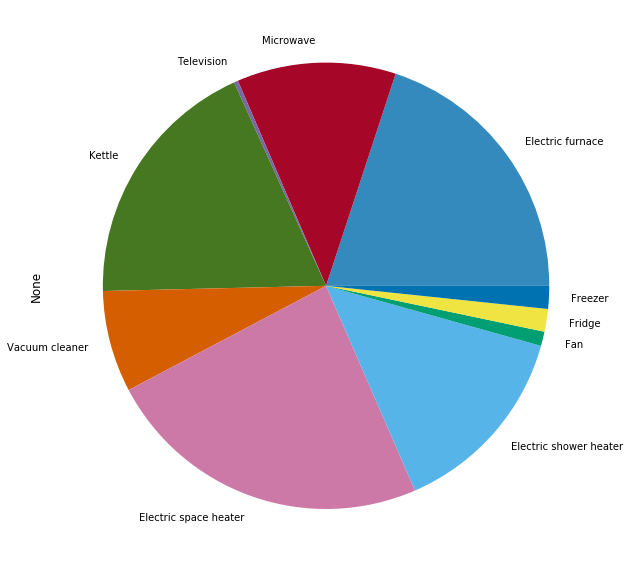

In [128]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Horno

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

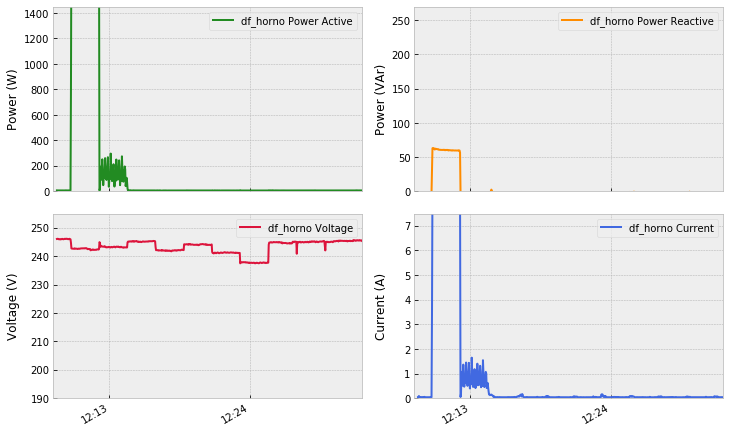

In [130]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final

df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_horno Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_horno Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_horno Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_horno Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['12:13','12:24'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_horno.svg', bbox_inches='tight', transparent=True)
pass

### Microondas

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (microondas)

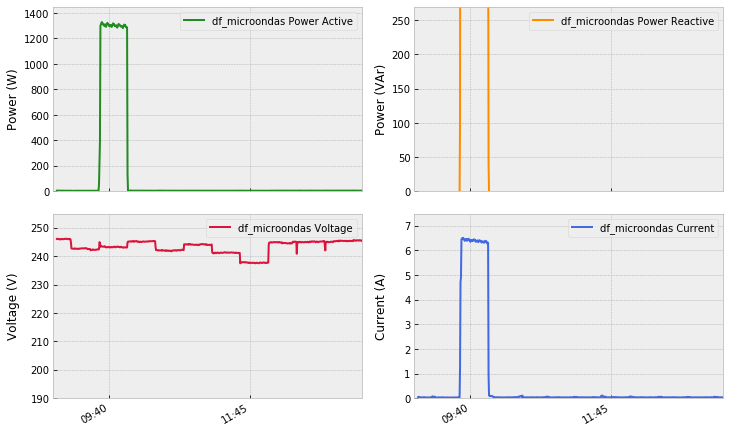

In [131]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final



df_mi = next(elec[3].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_microondas Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_microondas Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_microondas Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_microondas Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_microondas.svg', bbox_inches='tight', transparent=True)
pass

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

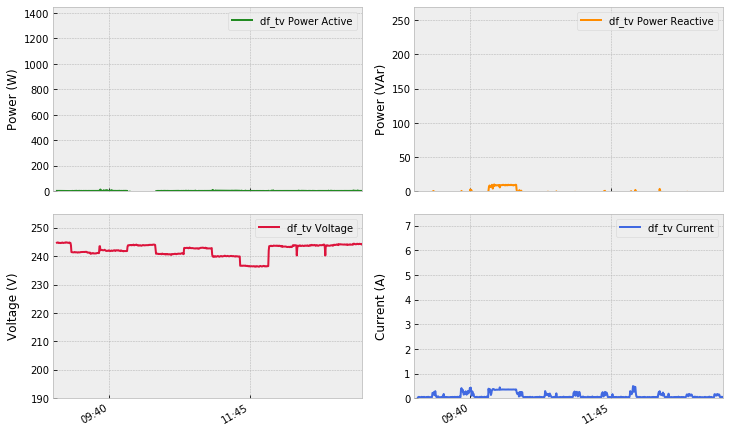

In [132]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

### Kettle

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

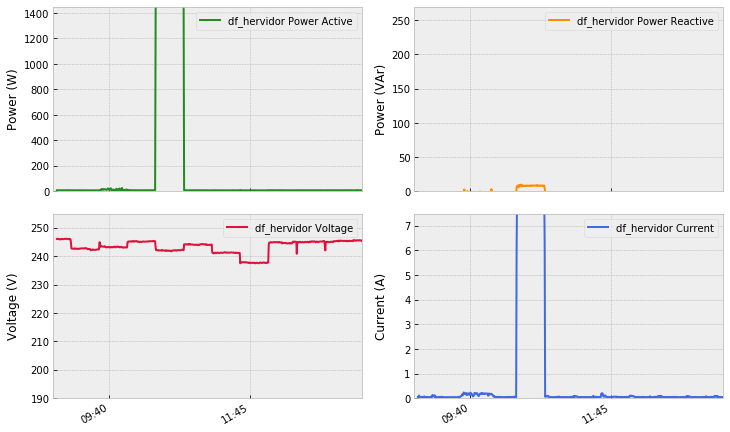

In [133]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


df_ke = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ke['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_hervidor Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ke['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_hervidor Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ke['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_hervidor Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ke['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_hervidor Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_hervidor.svg', bbox_inches='tight', transparent=True)
pass

###  Aspiradora

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

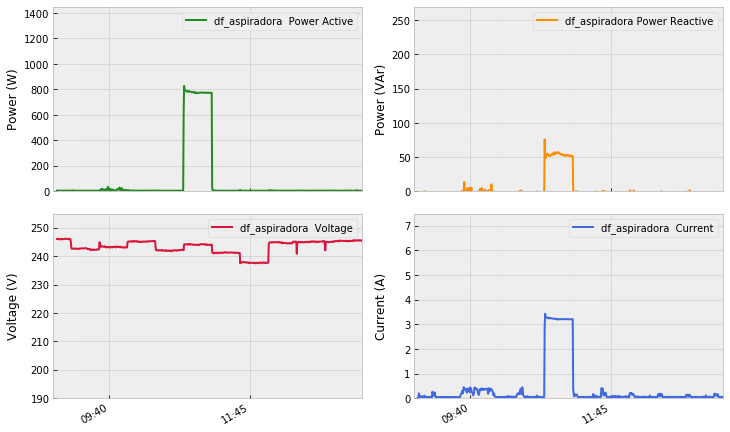

In [134]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final



df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vc ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_aspiradora  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vc ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_aspiradora Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vc ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_aspiradora  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vc ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_aspiradora  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_aspiradora.svg', bbox_inches='tight', transparent=True)
pass

### Estufa de aceite

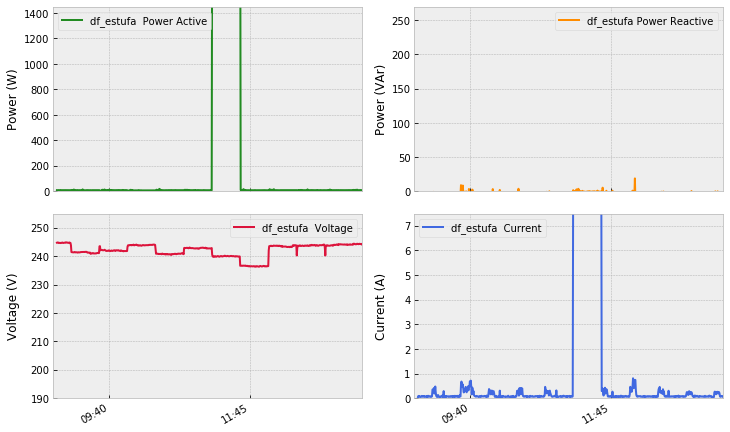

In [135]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final



df_sh = next(elec[7].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_estufa  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_estufa Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_estufa  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_estufa  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_estufa.svg', bbox_inches='tight', transparent=True)
pass

### Calentador

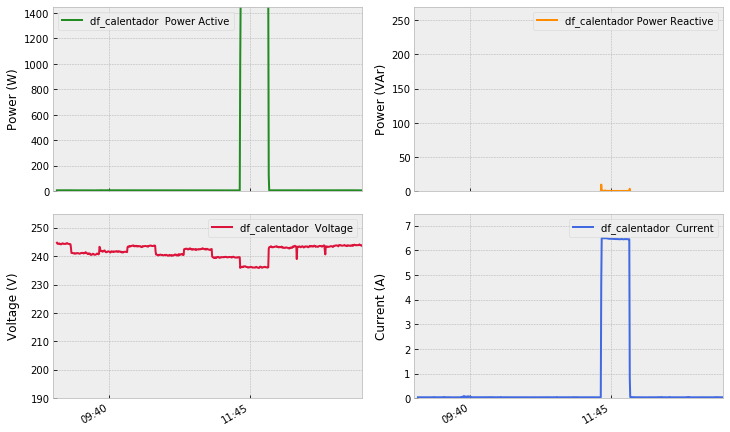

In [136]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final



df_sho = next(elec[8].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_calentador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_calentador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_calentador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_calentador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_calentador.svg', bbox_inches='tight', transparent=True)
pass

### Ventilador

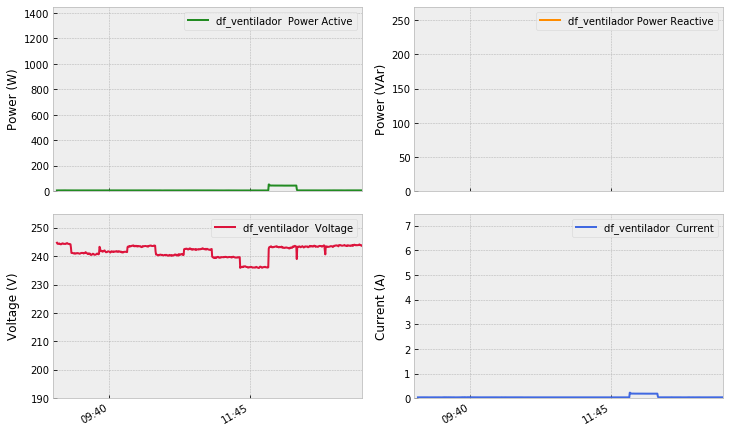

In [137]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final



df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_ventilador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_ventilador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_ventilador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_ventilador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ventilador.svg', bbox_inches='tight', transparent=True)
pass

### Nevera

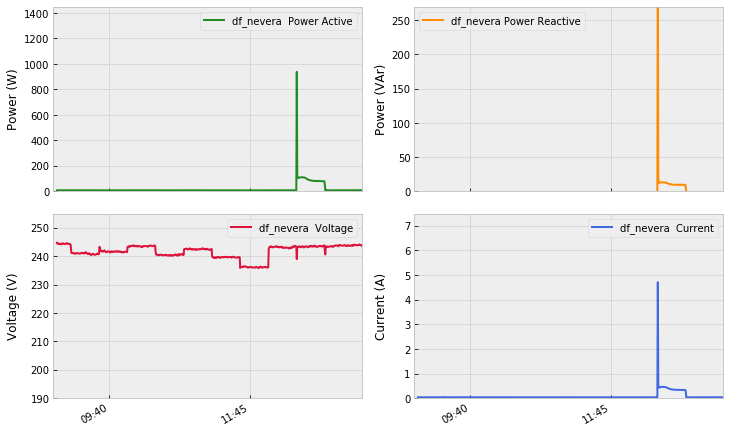

In [138]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final



df_fri = next(elec[10].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_nevera  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_nevera Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_nevera  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_nevera  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_nevera.svg', bbox_inches='tight', transparent=True)
pass

### Congelador

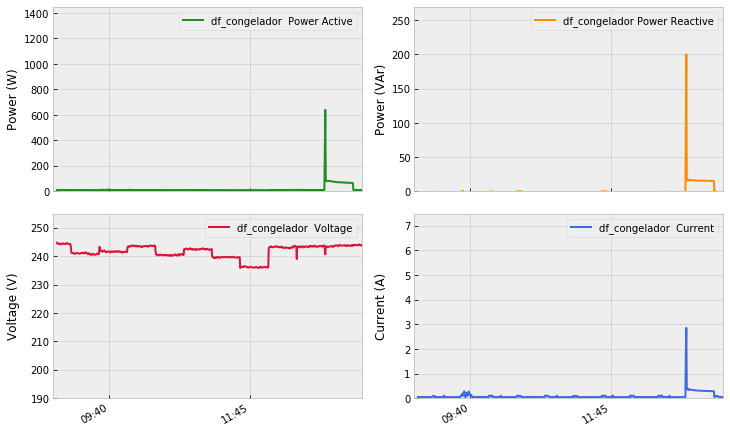

In [139]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final



df_fre = next(elec[11].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_congelador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_congelador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_congelador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_congelador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_congelador.svg', bbox_inches='tight', transparent=True)
pass

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

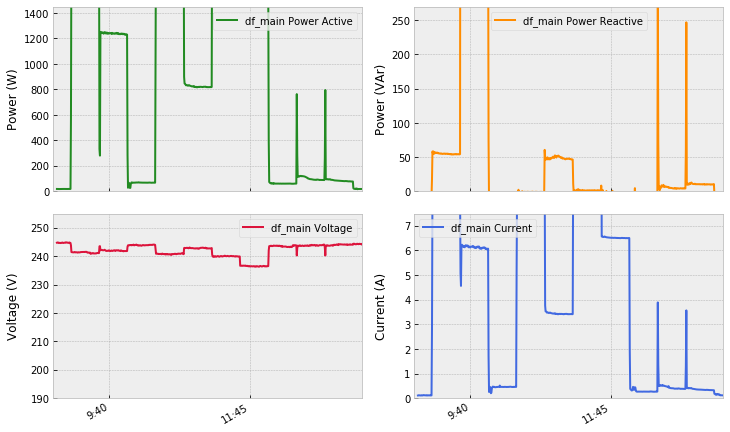

In [140]:
t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final



df_main = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-12-16 12:13:00+01:00','2022-12-16 12:24+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['9:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

### Trazar los electrodomésticos cuando estén en uso

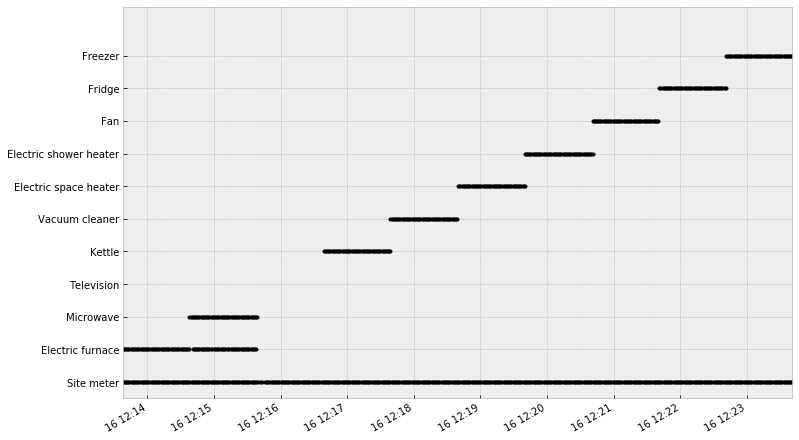

In [141]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

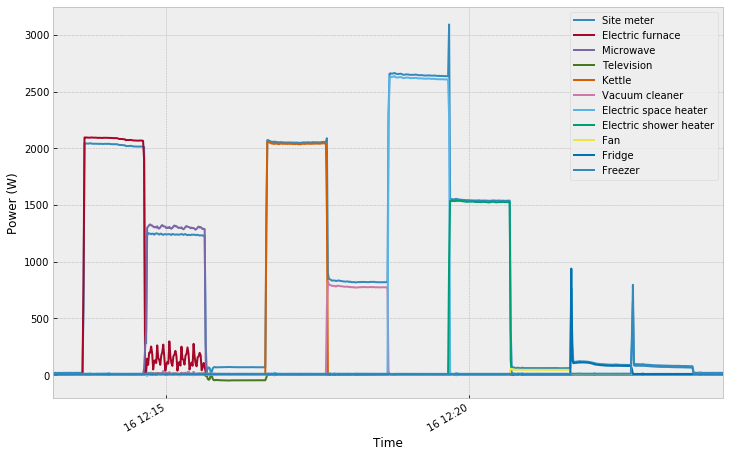

In [145]:
dsualm.set_window(start='2022-12-16', end='2022-12-17')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [147]:
from pandas.plotting import autocorrelation_plot

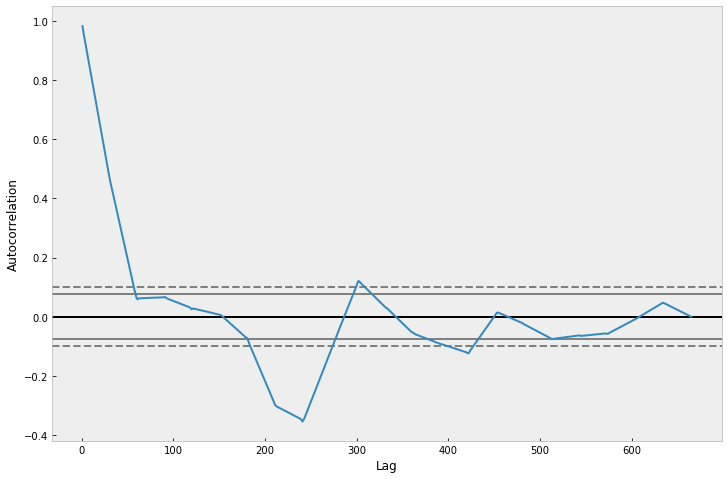

In [148]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [150]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

TypeError: no numeric data to plot

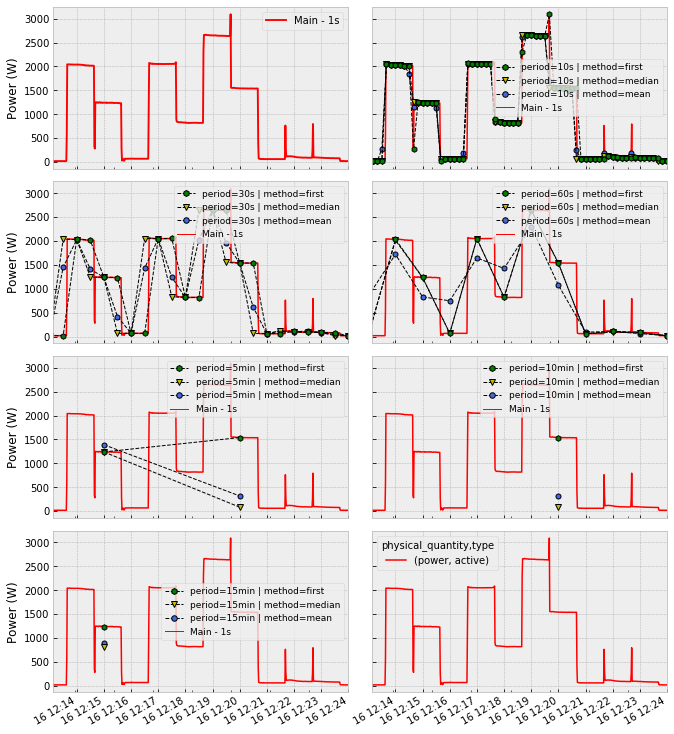

In [151]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

ax1.set(xlim=('2022-11-23 09:42:00+01:00','2022-11-23 11:45:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [152]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

TypeError: no numeric data to plot

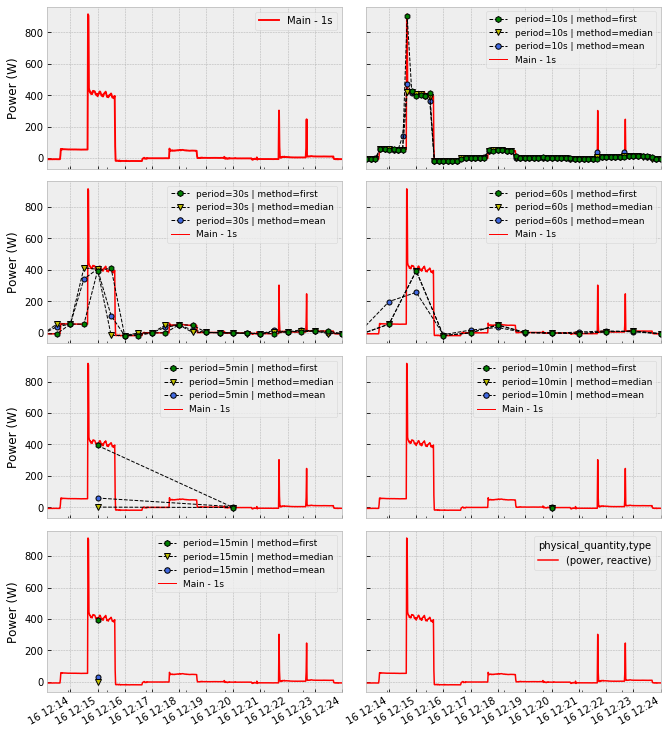

In [153]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-12-16 12:13:00+01:00' #tiempo inicial
t1 = '2022-12-16 12:24:00+01:00' #tiempo final


labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    
ax1.set(xlim=('2022-11-23 09:42:00+01:00','2022-11-23 11:45:00+01:00'))
#ax1.set(xlim=('2021-11-10 18:00:00+01:00','2021-11-12 18:05:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass